In [162]:
import os
import pandas as pd

In [163]:
silver_files = os.listdir('silver_data')
silver_files.sort()
silver_files

['BodyFatPercentage.csv',
 'BodyMass.csv',
 'HeartRate.csv',
 'HeartRateVariabilitySDNN.csv',
 'LeanBodyMass.csv',
 'RestingHeartRate.csv',
 'WalkingHeartRateAverage.csv']

In [ ]:
dfs = []

for silver_file in silver_files:
    df = pd.read_csv(f'silver_data/{silver_file}')
    
    # extract date part of the creation datetime after making it an datetime
    df.index = pd.to_datetime(df['creationDate']).dt.date
    df.drop(columns=['creationDate'], inplace=True)

    # grouping by date and taking mean value for that day
    df_v2 = df.groupby(df.index)[df.columns[0]].mean().reset_index()
    
    # setting the date as index
    df_v2.index = pd.to_datetime(df_v2['creationDate'])
    df_v2.drop(columns=['creationDate'], inplace=True)

    dfs.append(df_v2)

dfs

[              BodyFatPercentage in %
 creationDate                        
 2025-01-01                  0.248697
 2025-01-02                  0.248060
 2025-01-03                  0.241750
 2025-01-04                  0.258260
 2025-01-05                  0.259090
 ...                              ...
 2025-04-22                  0.245990
 2025-04-23                  0.237280
 2025-04-24                  0.244470
 2025-04-25                  0.240510
 2025-04-26                  0.244380
 
 [93 rows x 1 columns],
               BodyMass in kg
 creationDate                
 2025-01-01            73.762
 2025-01-02            74.337
 2025-01-03            74.293
 2025-01-04            74.847
 2025-01-05            74.376
 ...                      ...
 2025-04-22            73.378
 2025-04-23            73.414
 2025-04-24            74.282
 2025-04-25            74.633
 2025-04-26            75.498
 
 [98 rows x 1 columns],
               HeartRate in count/min
 creationDate             

In [193]:
df = pd.concat(dfs, axis=1)
df

,BodyFatPercentage in %,BodyMass in kg,HeartRate in count/min,HeartRateVariabilitySDNN in ms,LeanBodyMass in kg,RestingHeartRate in count/min,WalkingHeartRateAverage in count/min
creationDate,,,,,,,
2025-01-01,0.248697,73.762,78.166059,65.976673,55.418667,76.0,116.0
2025-01-02,0.248060,74.337,81.588822,99.210173,55.897000,67.5,103.5
2025-01-03,0.241750,74.293,77.283236,87.154564,56.333000,NaN,NaN
2025-01-04,0.258260,74.847,76.462807,91.516930,55.517000,69.0,111.5
2025-01-05,0.259090,74.376,95.303602,85.761182,55.106000,NaN,NaN
...,...,...,...,...,...,...,...
2025-04-22,0.245990,73.378,74.142760,112.814700,55.328000,NaN,103.0
2025-04-23,0.237280,73.414,82.244621,100.863086,55.994000,70.5,107.5
2025-04-24,0.244470,74.282,85.757525,53.483020,56.122000,78.0,110.5


In [192]:
# df.index = pd.to_datetime(df.index)
df.index.values

array(['2025-01-01T00:00:00.000000000', '2025-01-02T00:00:00.000000000',
       '2025-01-03T00:00:00.000000000', '2025-01-04T00:00:00.000000000',
       '2025-01-05T00:00:00.000000000', '2025-01-06T00:00:00.000000000',
       '2025-01-07T00:00:00.000000000', '2025-01-08T00:00:00.000000000',
       '2025-01-09T00:00:00.000000000', '2025-01-10T00:00:00.000000000',
       '2025-01-11T00:00:00.000000000', '2025-01-12T00:00:00.000000000',
       '2025-01-13T00:00:00.000000000', '2025-01-14T00:00:00.000000000',
       '2025-01-15T00:00:00.000000000', '2025-01-16T00:00:00.000000000',
       '2025-01-17T00:00:00.000000000', '2025-01-18T00:00:00.000000000',
       '2025-01-19T00:00:00.000000000', '2025-01-20T00:00:00.000000000',
       '2025-01-21T00:00:00.000000000', '2025-01-22T00:00:00.000000000',
       '2025-01-23T00:00:00.000000000', '2025-01-24T00:00:00.000000000',
       '2025-01-25T00:00:00.000000000', '2025-01-26T00:00:00.000000000',
       '2025-01-27T00:00:00.000000000', '2025-01-28

In [168]:
df.isna().sum()

BodyFatPercentage in %                  22
BodyMass in kg                          17
HeartRate in count/min                   2
HeartRateVariabilitySDNN in ms           3
LeanBodyMass in kg                      21
RestingHeartRate in count/min           25
WalkingHeartRateAverage in count/min    21
dtype: int64

In [185]:
df.interpolate(method='time', inplace=True)
df

,BodyFatPercentage in %,BodyMass in kg,HeartRate in count/min,HeartRateVariabilitySDNN in ms,LeanBodyMass in kg,RestingHeartRate in count/min,WalkingHeartRateAverage in count/min
creationDate,,,,,,,
2025-01-01,0.248697,73.762,78.166059,65.976673,55.418667,76.00,116.0
2025-01-02,0.248060,74.337,81.588822,99.210173,55.897000,67.50,103.5
2025-01-03,0.241750,74.293,77.283236,87.154564,56.333000,68.25,107.5
2025-01-04,0.258260,74.847,76.462807,91.516930,55.517000,69.00,111.5
2025-01-05,0.259090,74.376,95.303602,85.761182,55.106000,68.25,113.5
...,...,...,...,...,...,...,...
2025-04-22,0.245990,73.378,74.142760,112.814700,55.328000,67.75,103.0
2025-04-23,0.237280,73.414,82.244621,100.863086,55.994000,70.50,107.5
2025-04-24,0.244470,74.282,85.757525,53.483020,56.122000,78.00,110.5


In [186]:
df.isna().sum()

BodyFatPercentage in %                  0
BodyMass in kg                          0
HeartRate in count/min                  0
HeartRateVariabilitySDNN in ms          0
LeanBodyMass in kg                      0
RestingHeartRate in count/min           0
WalkingHeartRateAverage in count/min    0
dtype: int64

In [ ]:
# Dieting timeline
# January 1     to March 9th    Not on diet
# March 10th    to March 27th   On diet
# March 28th    to April 26th   Not on diet
# April 27th    to now          On diet

# Jan: 01
# Feb: 02
# Mar: 03
# Apr: 04
# May: 05
# Jun: 06

# datetime is of format: '2025-04-12T00:00:00.000000000'
def am_i_on_diet(datetime: str) -> bool:
    date = datetime.split('T')[0] # date format: '2025-04-12'
    _, month, day = date.split('-')

    dayNum = int(day)

    # March 10th    to March 27th   On diet
    if month == '03' and 10 <= dayNum <= 27:
        return True

    # April 27th    to now          On diet
    if month == '04' and 27 <= dayNum:
        return True

    if month == '05':
        return True

    # For any other datetime
    return False

<Axes: xlabel='creationDate'>

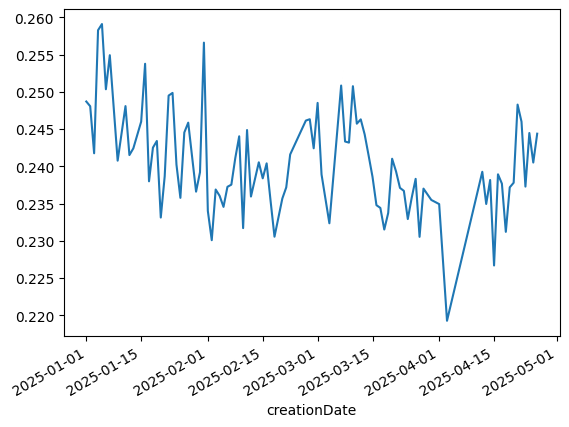

In [187]:
df['BodyFatPercentage in %'].plot.line()

<Axes: xlabel='creationDate'>

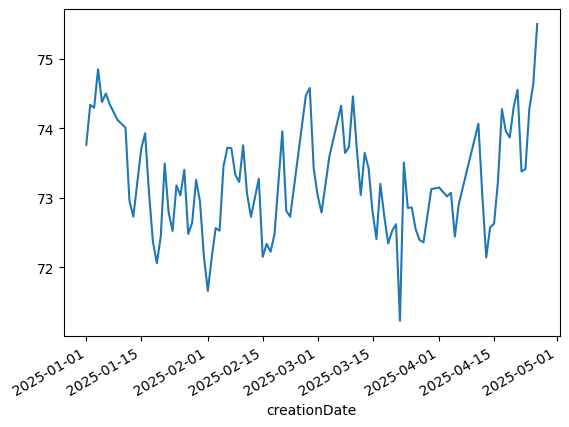

In [188]:
df['BodyMass in kg'].plot.line()

<Axes: xlabel='creationDate'>

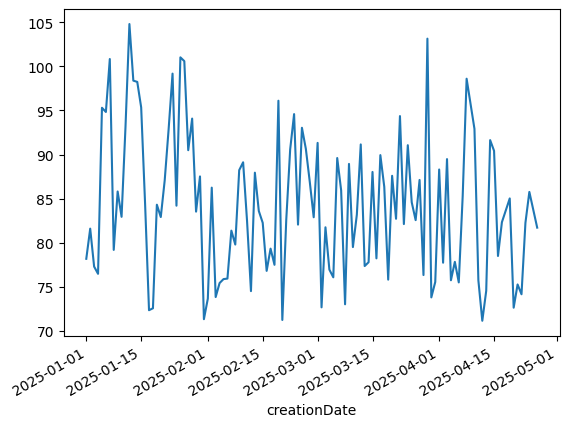

In [189]:
df['HeartRate in count/min'].plot.line()

<Axes: xlabel='creationDate'>

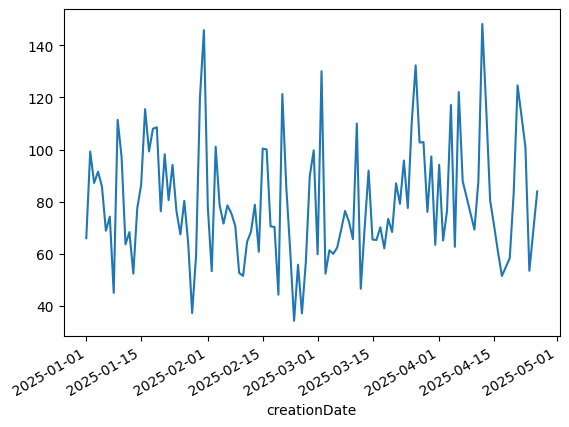

In [190]:
df['HeartRateVariabilitySDNN in ms'].plot.line()